     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 1.1 MB/s eta 0:00:00


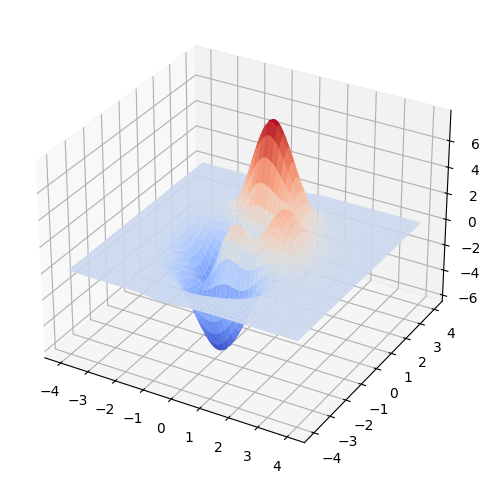

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=15) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resutled in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")


[[-2.68483275  3.68536183]
 [ 2.03756124 -0.84835571]
 [-3.78172295 -3.93403801]
 [ 1.80093698 -3.67371401]
 [ 3.00042022 -0.39513307]
 [-0.23780291 -0.26551775]
 [ 0.67528006  3.42493819]
 [-0.7220995  -2.73482162]
 [-1.07725441 -0.85888303]
 [ 2.71565133  3.32825687]
 [-1.68975789  2.76587784]
 [-2.32111772 -0.57687673]
 [-3.10018054 -0.01176655]
 [-0.93407539 -2.77888382]
 [ 2.73509098  3.52929559]
 [ 3.17247234 -3.15544188]
 [-1.80330622 -3.14688933]
 [ 0.07676516 -2.45792292]
 [ 0.74304796 -0.89577985]
 [-2.5068311  -1.428254  ]
 [ 1.81691687 -3.66088256]
 [-2.28722915 -3.83719962]
 [-0.987267    2.9899229 ]
 [-1.68139954  3.56413828]
 [ 3.02011184  1.51871318]
 [-1.73116575  3.24178699]
 [ 3.47771601  2.07268189]
 [-3.64112686  2.92851072]
 [ 2.69244134  0.55223421]
 [-1.63837656  3.84658111]
 [-1.04597202  3.41116157]
 [ 2.86439368 -2.06222729]
 [ 2.1150371  -0.39498797]
 [ 1.22305983 -2.69902117]
 [ 1.58071611  2.55408768]
 [ 2.22991322 -3.24705313]
 [ 0.52084248  0.91518184]
 

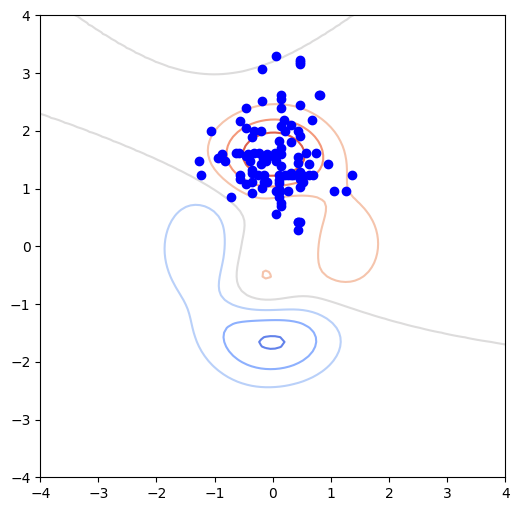

In [1]:
!pip install pygad
import pygad
import numpy
import numpy as np
import matplotlib.pyplot as plt

def func_3D(x,y):
    wynik= 3*(1-x**2) * np.exp(-(x**2)-(y+1)**2) \
    -10*(x/5 -x**3 -y**5)* \
    np.exp(-x**2-y**2)- \
    (1/3) * np.exp(-(x+1)**2 -x**2)
    return wynik

x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
Z = func_3D(X,Y)
plt.rcParams["figure.figsize"] = (6,6)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap='coolwarm')
plt.show()

def fitness_function(ga_instance, solution, solution_idx):
    return func_3D(solution[0],solution[1])

last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print(f"Generation = {ga_instance.generations_completed}")
    print(f"Fitness ={ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]}")
    print(f"Change ={ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness}")
    print()
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]


ga_instance = pygad.GA(
    num_generations=50,
    num_parents_mating=15,
    sol_per_pop=100,
    num_genes=2,
    init_range_low=-4,
    init_range_high=4,
    fitness_func=fitness_function,
    crossover_type="single_point",
    parent_selection_type = "rws",
    mutation_type = "random",
    mutation_percent_genes=15,
    on_generation=on_generation

)

print(ga_instance.population)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Argumenty najlepszego rozw : {solution}")
print(f"Wartosc dla najlepszego rozw: {solution_fitness}")

def wykres_populacji(ga_instance):
    x = np.linspace(-4, 4, 100)
    y = np.linspace(-4, 4, 100)
    X, Y = np.meshgrid(x, y)
    Z = func_3D(X,Y)
    plt.contour(X, Y, Z, cmap='coolwarm')
    plt.plot(ga_instance.population[:,0], ga_instance.population[:,1],'bo')
    plt.show()

wykres_populacji(ga_instance)
